### From the given information of the breast cancer dataset , the target variable is either a malignant cancer or benign cancer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
# Breast cancer dataset for classification
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


### Displaying the target names in the dataset
#### Using head() to display first few rows of the dataset

In [2]:
df = pd.read_csv('./data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print(df.memory_usage())
print("=================================")
print("Total\t\t\t",df.memory_usage().sum())

Index                       128
id                         4552
diagnosis                  4552
radius_mean                4552
texture_mean               4552
perimeter_mean             4552
area_mean                  4552
smoothness_mean            4552
compactness_mean           4552
concavity_mean             4552
concave points_mean        4552
symmetry_mean              4552
fractal_dimension_mean     4552
radius_se                  4552
texture_se                 4552
perimeter_se               4552
area_se                    4552
smoothness_se              4552
compactness_se             4552
concavity_se               4552
concave points_se          4552
symmetry_se                4552
fractal_dimension_se       4552
radius_worst               4552
texture_worst              4552
perimeter_worst            4552
area_worst                 4552
smoothness_worst           4552
compactness_worst          4552
concavity_worst            4552
concave points_worst       4552
symmetry

### Information about the dataset - Total 33 columns/features and no null entries

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Removing the last column i.e. the 33rd one as it is not needed

In [5]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
# skewness
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

### Number of datapoints for malignant and for benign type of cancer

In [7]:
print ("Total number of diagnosis are ", str(df.shape[0]), ", ", df.diagnosis.value_counts()['B'], "Benign and Malignant are",
       df.diagnosis.value_counts()['M'])

Total number of diagnosis are  569 ,  357 Benign and Malignant are 212


### Dataset mathematical description

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Line Plotting Area_Worst

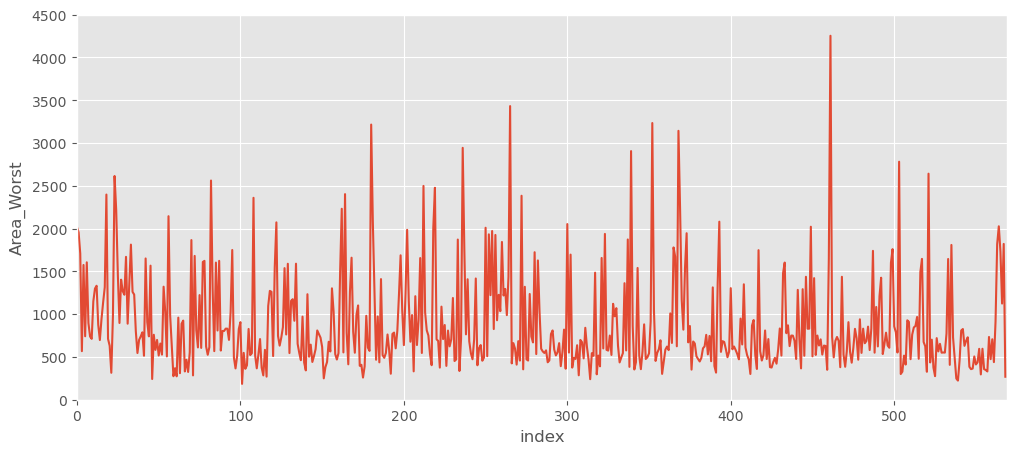

In [10]:
# Plotting with index along the x-axis
df['area_worst'].plot(figsize=(12, 5))

plt.xlim(0, 569) 
plt.ylim(0, 4500) 
plt.xlabel('index')
plt.ylabel('Area_Worst'); 
plt.show()

### Our dataset already contains the mean values of all the columns

In [11]:
featureMeans = list(df.columns[1:11])

### Finding the correlation between columns

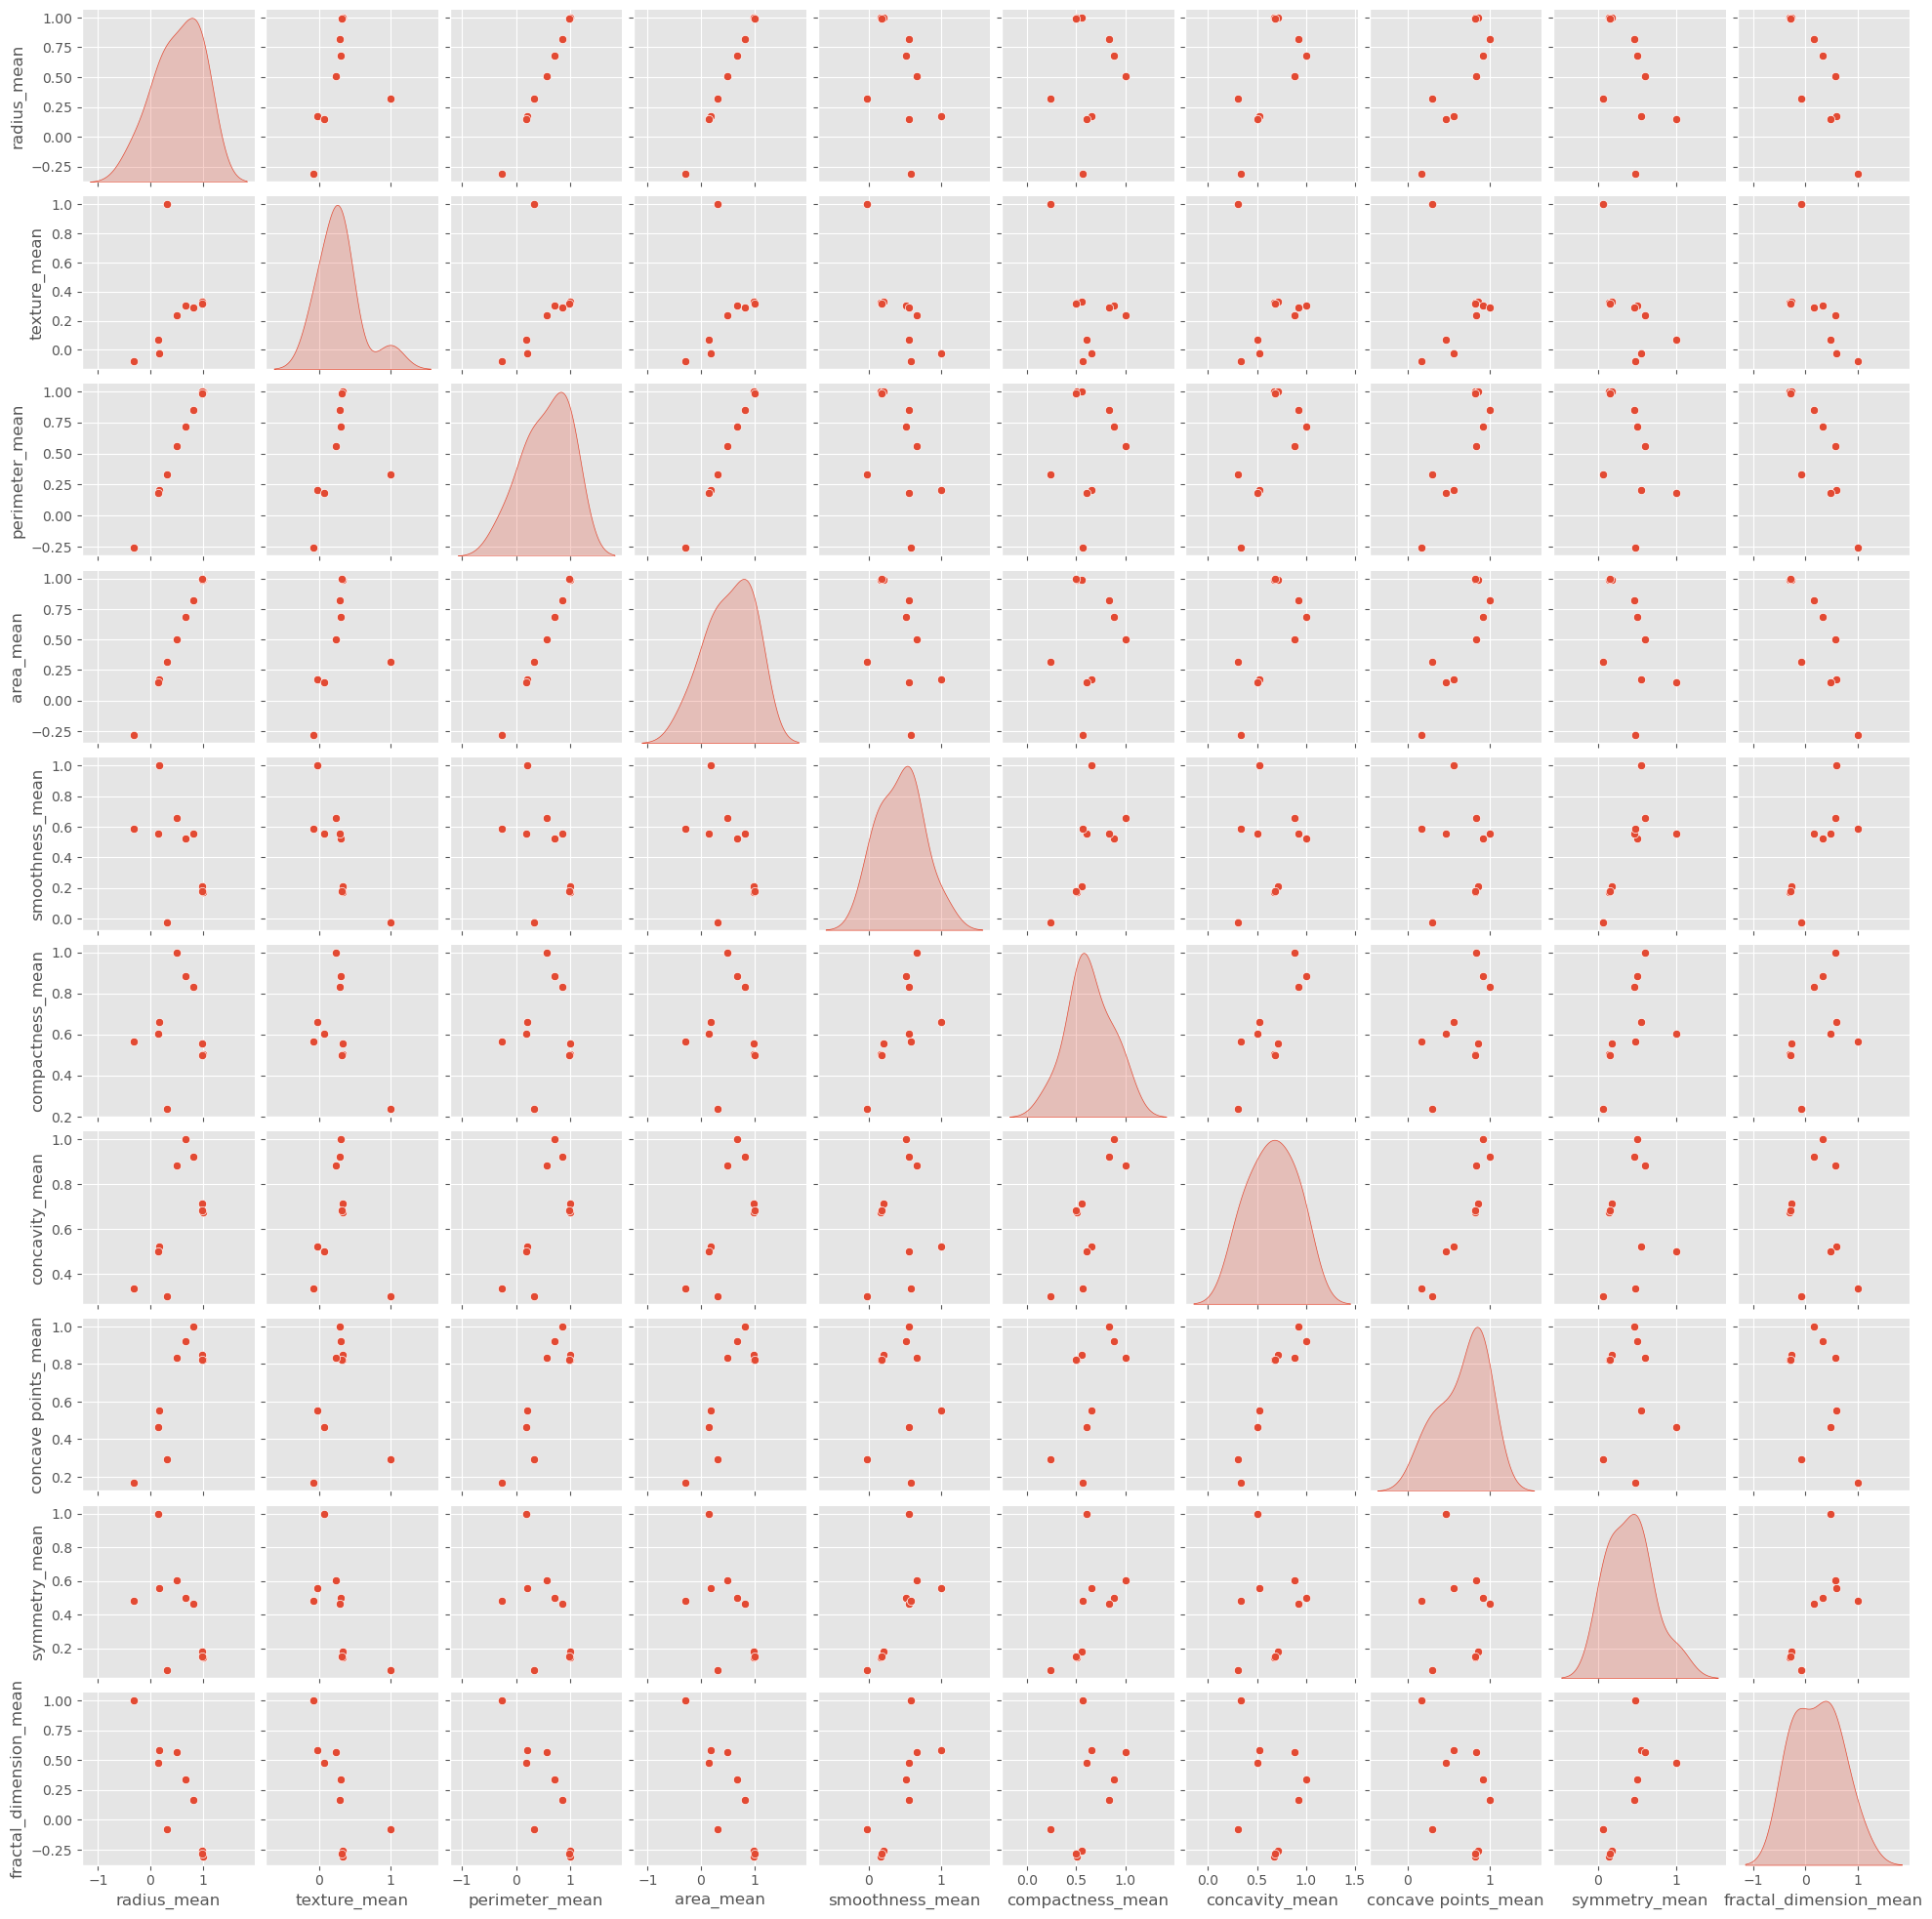

In [12]:

correlationData = df[featureMeans].corr()
sns.pairplot(df[featureMeans].corr(), diag_kind='kde', height=2);
plt.show()

### Heatmap

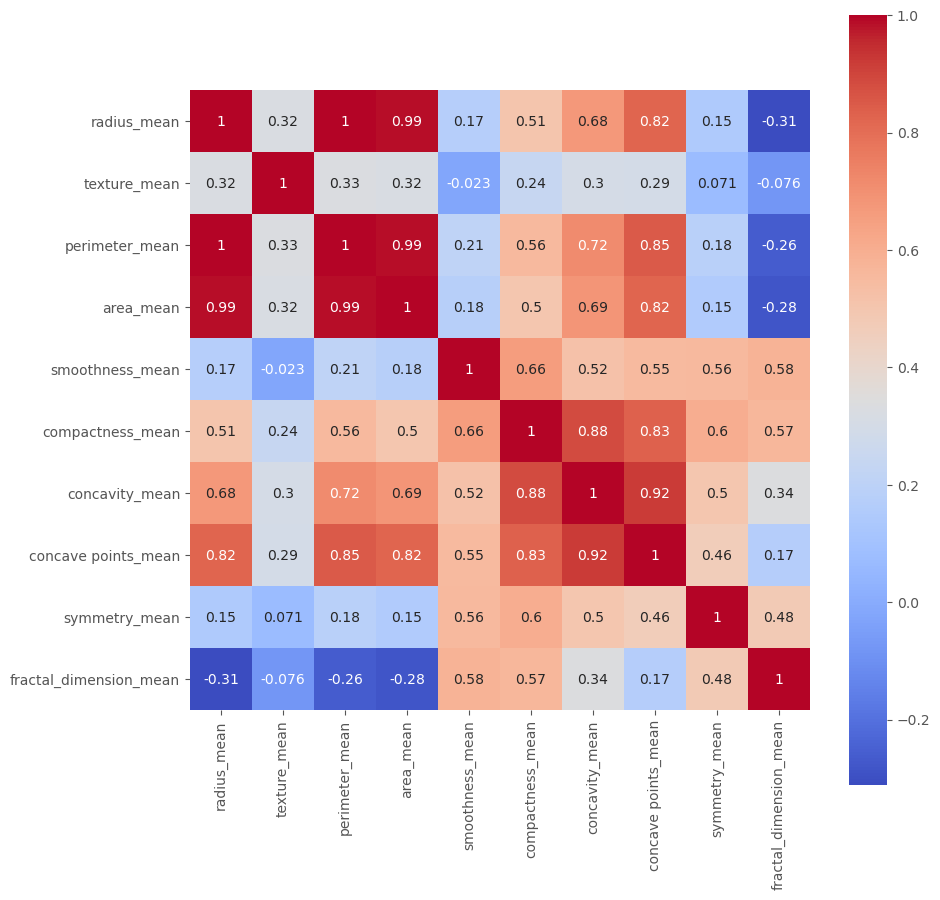

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

### Plotting the distribution of each type of diagnosis for some of the mean features

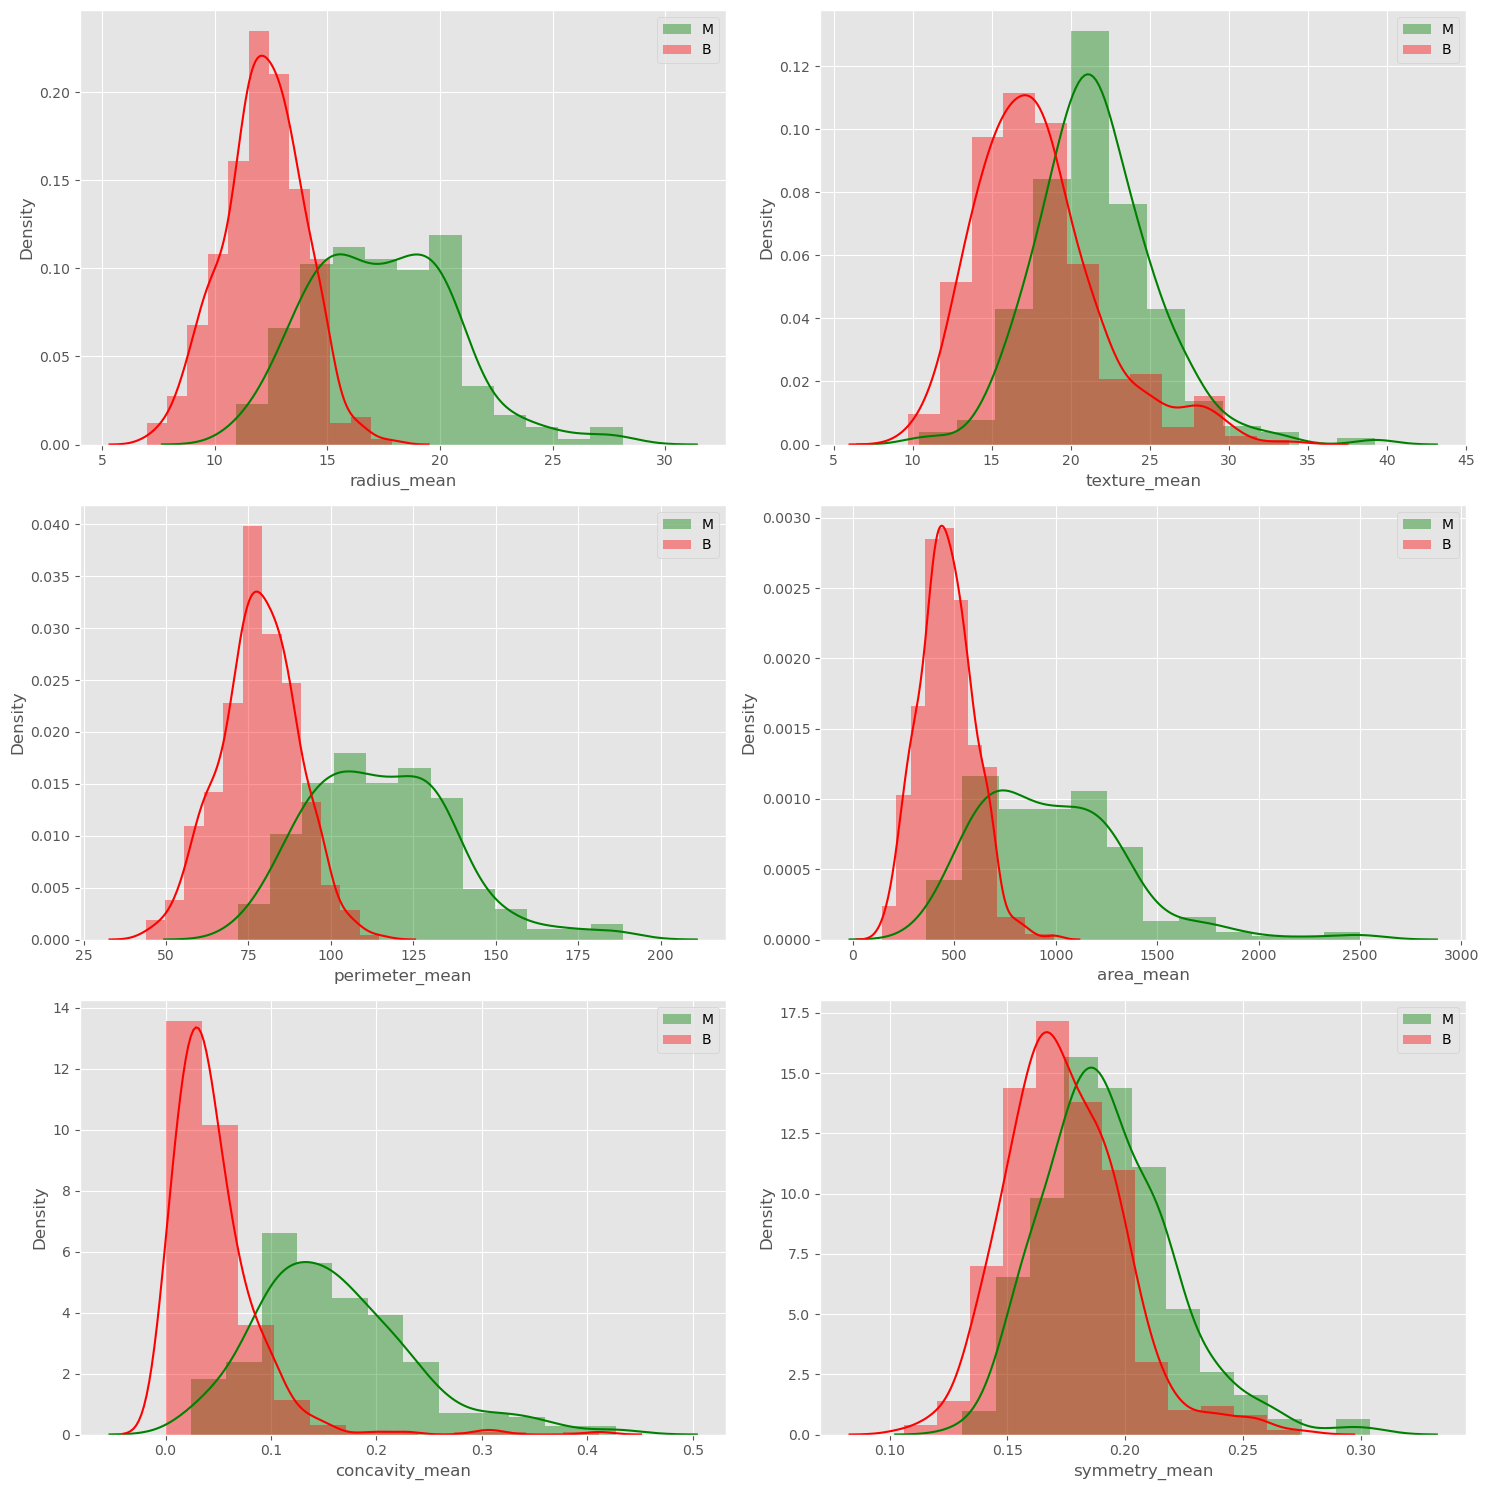

In [9]:
bins = 12
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.distplot(df[df['diagnosis']=='M']['radius_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['radius_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
sns.distplot(df[df['diagnosis']=='M']['texture_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['texture_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
sns.distplot(df[df['diagnosis']=='M']['perimeter_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['perimeter_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
sns.distplot(df[df['diagnosis']=='M']['area_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['area_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 5)
sns.distplot(df[df['diagnosis']=='M']['concavity_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['concavity_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 6)
sns.distplot(df[df['diagnosis']=='M']['symmetry_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['symmetry_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()